<a href="https://colab.research.google.com/github/Andro2k/Metodos-Numericos/blob/main/Taller_de_Taylor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Metodo de Taylor**
### **Integrantes** :

*   Andino Jose Luis
*   Macas Mateo
___
### **Taller**
*   Para la función $1/x$ en $x_0 = 1$, grafique la función, y las curvas de los 4 primeros polinomios de Taylor entre $0 < x ≤3$.




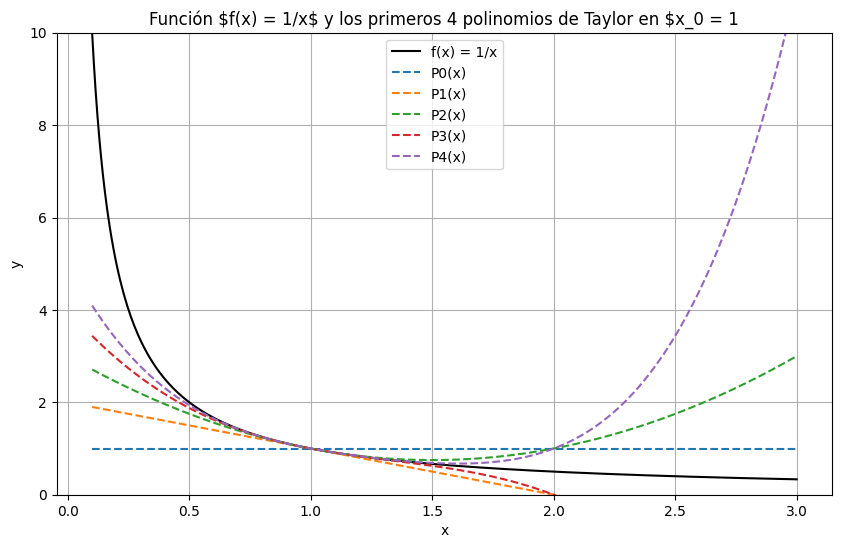

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from typing import Callable

# Función para calcular el polinomio de Taylor
def taylor_approximation(*, fcn: Callable[[float], float], x0: float, n: int) -> sym.Expr:
    """Aproximate a function using the Taylor nth polynomial"""
    x = sym.Symbol('x')
    f_sym = sym.Lambda(x, fcn(x))  # Convertir la función en una expresión de sympy
    taylor = sym.sympify(0)
    for i in range(n + 1):
        term = f_sym(x).diff(x, i).subs(x, x0) / sym.factorial(i) * (x - x0) ** i
        taylor += term
    return taylor

# Ejemplo de uso
fcn = lambda x: 1/x
polynomials = [taylor_approximation(fcn=fcn, x0=1, n=i) for i in range(5)]

# Convertir las expresiones de sympy a funciones lambda de numpy
polynomial_functions = [np.vectorize(sym.lambdify(sym.Symbol('x'), poly, 'numpy')) for poly in polynomials]

# Valores de x para la gráfica
x = np.linspace(0.1, 3, 400)

# Definir la función original
def f(x):
    return 1 / x

# Graficar la función y los polinomios de Taylor
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label='f(x) = 1/x', color='black')

# Nombres de los polinomios para la leyenda
polynomial_labels = [f'P{i}(x)' for i in range(5)]

# Graficar cada polinomio
for poly_func, label in zip(polynomial_functions, polynomial_labels):
    plt.plot(x, poly_func(x), label=label, linestyle='--')

# Configurar la gráfica
plt.ylim(0, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función $f(x) = 1/x$ y los primeros 4 polinomios de Taylor en $x_0 = 1')
plt.legend()
plt.grid(True)
plt.show()